# Practica #5 Diabetes

In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow import keras

In [13]:
#Leer el archivo
df = pd.read_csv("diabetes.csv")
df.head(5)

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X22,X23,X24,X25,X26,X27,X28,X29,X30,Labels
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [14]:
#Separar variables de los objetivos Altos y Ancho, objetivos valores 0 y 1 de la (última columna)

# Separar variables y etiquetas
x = df[['X1','X2','X3','X4','X5','X6','X7','X8','X9','X10','X11','X12','X13','X14','X15','X16','X17','X18','X19','X20','X21','X22','X23','X24','X25','X26','X27','X28','X29','X30']].values
y = df['Labels'].values

# Normalizar los datos
scaler = StandardScaler()
x = scaler.fit_transform(x)

# Convertir las etiquetas a formato de valores enteros
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)


In [15]:
#Dividir conjunto de datos 1. Probar y 2. Entrenar
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 41)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(455, 30) (455,)
(114, 30) (114,)


In [16]:
#Crear el (M O D E L O) PERCEPTRON SIMPLE
# Crear el modelo de red neuronal con una neurona en la capa de salida
model = keras.Sequential([
    keras.layers.Dense(1024, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(127, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')  # Una neurona con activación sigmoid
])
print(model.summary())

model.compile(loss = keras.losses.BinaryCrossentropy(),optimizer = "adam", metrics = ["accuracy"])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1024)              31744     
                                                                 
 dense_7 (Dense)             (None, 512)               524800    
                                                                 
 dense_8 (Dense)             (None, 256)               131328    
                                                                 
 dense_9 (Dense)             (None, 128)               32896     
                                                                 
 dense_10 (Dense)            (None, 127)               16383     
                                                                 
 dense_11 (Dense)            (None, 1)                 128       
                                                                 
Total params: 737,279
Trainable params: 737,279
Non-tr

In [17]:
#Entrenar el modelo.
history = model.fit(X_train, y_train, epochs = 132)

Epoch 1/132
15/15 [==============================] - 0s 6ms/step - loss: 0.2713 - accuracy: 0.9077
Epoch 2/132
15/15 [==============================] - 0s 6ms/step - loss: 0.0839 - accuracy: 0.9758
Epoch 3/132
15/15 [==============================] - 0s 6ms/step - loss: 0.0602 - accuracy: 0.9802
Epoch 4/132
15/15 [==============================] - 0s 5ms/step - loss: 0.0462 - accuracy: 0.9868
Epoch 5/132
15/15 [==============================] - 0s 6ms/step - loss: 0.0551 - accuracy: 0.9780
Epoch 6/132
15/15 [==============================] - 0s 6ms/step - loss: 0.0394 - accuracy: 0.9868
Epoch 7/132
15/15 [==============================] - 0s 5ms/step - loss: 0.0361 - accuracy: 0.9846
Epoch 8/132
15/15 [==============================] - 0s 5ms/step - loss: 0.0123 - accuracy: 0.9978
Epoch 9/132
15/15 [==============================] - 0s 5ms/step - loss: 0.0062 - accuracy: 0.9978
Epoch 10/132
15/15 [==============================] - 0s 6ms/step - loss: 0.0033 - accuracy: 0.9978
Epoch 11/

In [18]:
#Ver los resultados
print(model.evaluate(X_test, y_test))

4/4 [==============================] - 0s 5ms/step - loss: 8.6926e-05 - accuracy: 1.0000
[8.692553819855675e-05, 1.0]


In [19]:
#Evaluar el modelo y ver su presición y saber si es confiable.
sample = X_test[4, :]
prediction = model.predict(np.expand_dims(sample,axis=0))

prediction = 0 if prediction<=0.5 else 1

print(prediction)


1/1 [==============================] - 0s 100ms/step
1


In [20]:
print(y_test [4]== prediction)

True


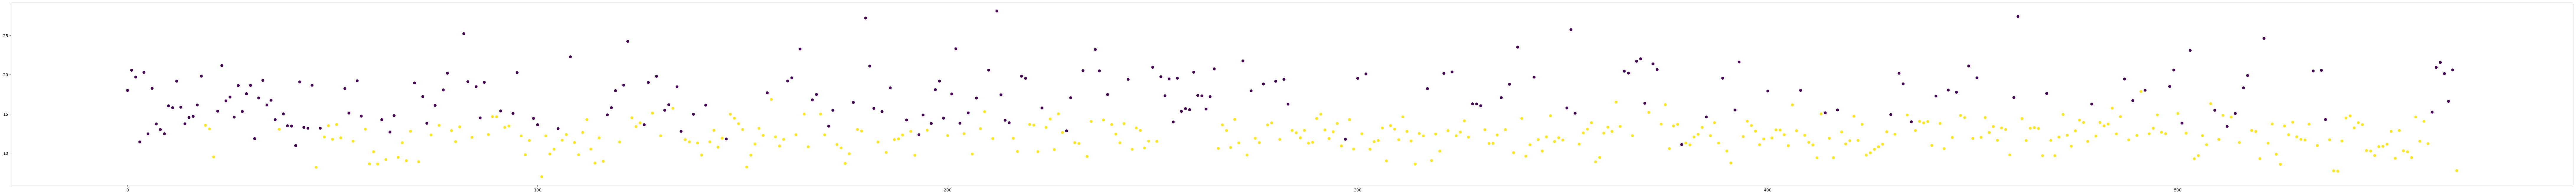

In [21]:
from matplotlib import pyplot as plt
plt.figure(figsize=[112,8])
plt.scatter(df.iloc[:,0].values,df.iloc[:,1].values,
            c= df.iloc[:,-1].values)
plt.show()

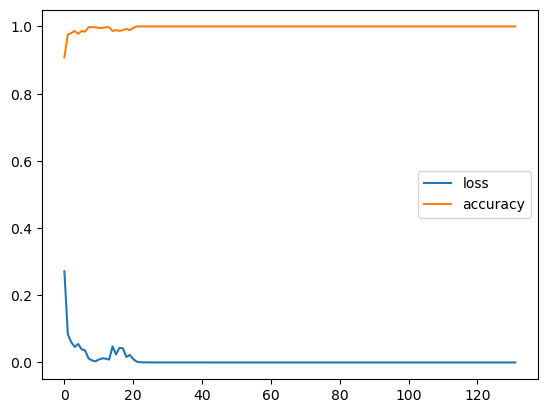

In [22]:
values=pd.DataFrame(history.history)
values.plot()
plt.show()